# 1 - Introdcution


Nama : Dicky Librata Sembiring 

Dataset : Superstore Marketing Campaign

Objective : Memprediksi Customer Response dengan menggunakan model machine learning


## Link Streamlit
https://huggingface.co/spaces/barentz96/Milestone_2_Phase_1

# 2 - Import Libraries

> Berikut adalah library python yang digunakan

In [1]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix, precision_score, fbeta_score, make_scorer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

from feature_engine.outliers import Winsorizer

from warnings import filterwarnings

import pickle

d:\Miniconda\envs\dls\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# 3 - Data Loading

> Selanjutnya dilakukan loading dataset. Kemudian beberapa eksplorasi sederhana seperti melihat jumlah baris dan kolom data, nama dan type data masing - masing kolom, serta basic info dari data yang telah di load

In [2]:
# Load Dataset
df_ori = pd.read_csv('superstore_data.csv')

# Setting display pandas dataframe showing all columns
pd.set_option('display.max_columns', None) 
# Setting format floating to 2 decimal
pd.options.display.float_format = '{:.2f}'.format

Dari sumber dataset, penulis memperoleh informasi mengnai masing - masing column sebagai berikut:
- ID - Unique ID of each customer

- Year_Birth - Age of the customer
- Dt_Customer - date of customer's enrollment with the company
- Recency - number of days since the last purchase
- Education - customer's level of education
- Marital - customer's marital status
- Kidhome - number of small children in customer's household
- Teenhome - number of teenagers in customer's household
- Income - customer's yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company's website
- NumWebVisitsMonth - number of visits to company's website in the last month
- Reponse - The Response from customer to the marketing campaign ( 1 is accept, 0 is denied)
- Complain - 1 if the customer complained in the last 2 years

In [3]:
# Duplicate Dataset
# Dilakukan agar data set original tidak berubah apabila dilakukan pengolahan pada data
df = df_ori.copy()
# Showing First 10 Data
df.head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.00,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.00,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.00,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.00,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.00,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.00,0,0,3/17/2014,0,336,130,411,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.00,0,0,1/29/2014,0,769,80,252,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.00,0,1,1/18/2014,0,78,0,11,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.00,0,1,11/1/2014,0,384,0,102,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.00,0,1,11/1/2014,0,384,0,102,21,32,5,3,6,2,9,4,0,0


In [4]:
# Showing 10 Last Data
df.tail(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2230,3363,1974,2n Cycle,Married,20130.00,0,0,3/17/2014,99,0,6,3,7,6,12,1,1,0,3,8,0,0
2231,8595,1973,Graduation,Widow,42429.00,0,1,11/2/2014,99,55,0,6,2,0,4,2,1,1,3,5,0,0
2232,7232,1973,Graduation,Widow,42429.00,0,1,11/2/2014,99,55,0,6,2,0,4,2,1,1,3,5,0,0
2233,7829,1900,2n Cycle,Divorced,36640.00,1,0,9/26/2013,99,15,6,8,7,4,25,1,2,1,2,5,0,1
2234,9977,1973,Graduation,Divorced,78901.00,0,1,9/17/2013,99,321,11,309,33,26,34,3,9,3,5,4,0,0
2235,10142,1976,PhD,Divorced,66476.00,0,1,7/3/2013,99,372,18,126,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.00,1,0,1/22/2013,99,5,10,13,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.00,1,0,3/12/2012,99,185,2,88,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.00,0,0,11/29/2012,99,267,38,701,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.00,0,2,1/9/2012,99,169,24,553,188,0,144,1,8,5,4,7,1,0


In [5]:
# Jumlah baris dan kolom serta nama kolom
print(f"Jumlah baris : {df.shape[0]}")
print(f"Jumlah kolom : {df.shape[1]}")
print(f"Nama kolom : {df.columns}")


Jumlah baris : 2240
Jumlah kolom : 22
Nama kolom : Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')


In [6]:
# Check basic info Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Check Numerical Dataset 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2240.00,5592.16,3246.66,0.00,2828.25,5458.50,8427.75,11191.00
Year_Birth,2240.00,1968.81,11.98,1893.00,1959.00,1970.00,1977.00,1996.00
Income,2216.00,52247.25,25173.08,1730.00,35303.00,51381.50,68522.00,666666.00
Kidhome,2240.00,0.44,0.54,0.00,0.00,0.00,1.00,2.00
Teenhome,2240.00,0.51,0.54,0.00,0.00,0.00,1.00,2.00
Recency,2240.00,49.11,28.96,0.00,24.00,49.00,74.00,99.00
MntWines,2240.00,303.94,336.60,0.00,23.75,173.50,504.25,1493.00
MntFruits,2240.00,26.30,39.77,0.00,1.00,8.00,33.00,199.00
MntMeatProducts,2240.00,166.95,225.72,0.00,16.00,67.00,232.00,1725.00
MntFishProducts,2240.00,37.53,54.63,0.00,3.00,12.00,50.00,259.00


Berdasarkan tabel, dapat dilihat bahwa column `Kidhome and Teenhome` memiliki rata-rata `0.44 dan 0.51` dan nilai  `maximun` adalah `2`. Boleh di asumsikan bahwa secara global, customer mayoritas `tidak memiliki anak (0) atau hanya punya 1 anak saja`

Dari informasi diatas penulis memutuskan untuk melakukan droping kolom `Id dan Dt-Customer`, Karena hanya berisi informasi untuk masing masing customer dan tidak relevan untuk digunkan sebagai pembelajaran model

In [8]:
# Drop column Id
df = df.drop(columns=['Id', 'Dt_Customer'])

# 4 - Exploratory Data Analysis (EDA)

Setelah mengetahui beberapa info dasar, penulis kemudian melakukan eksplorasi lanjutan berupa pengecekan apakah ada data yang memiliki `duplicate` atau `missing value`, cek `distribusi data`, mencari `Insight` yang dapat disimpulkan, serta mencari hubungan setiap kolom terhadap kolom `Response` yang merupakan target dari dataset ini

Langkah pertama adalah melakukan pengelompokan data berdasarkan jenis datanya apakah kategorikal atau numerik berdasarkan informasi yang didapat pada data loading

In [9]:
# Numerical and Categorical Column
num_col = ['Year_Birth', 'Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

cat_col = ['Education','Marital_Status', 'Kidhome','Teenhome',
       'Response', 'Complain']

print('Numerical Columns : ', num_col)
print('\nCategorical Columns : ', cat_col)

Numerical Columns :  ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

Categorical Columns :  ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Response', 'Complain']


## Cek Missing Value dan Duplicate
Semua algoritma machine learning tidak dapat dapat bekerja apabila terdapat missing value. Sedangkan data duplicate akan membuat hasil prediksi model menjadi bias. Sehingga dilakukan proses handling missing value dan data dupilkat

In [10]:
# Cek missing value dan duplicated data
num_miss_val = 0
for i in df:
    miss_val = df[i].isnull().sum()
    if miss_val > 0:
        print(i, ' : ', miss_val)
        print(f'Percentage of missing value {i} : {miss_val/len(df[i].values):.2f}%')
        num_miss_val += 1

if num_miss_val == 0:
    print('Tidak Ada Missing Value')

print(f"Duplicates Data : {df.duplicated().sum()}")
print(f'Percentage of Duplicate Data {i} : {df.duplicated().sum()/len(df[i].values):.2f}%')

Income  :  24
Percentage of missing value Income : 0.01%
Duplicates Data : 182
Percentage of Duplicate Data Complain : 0.08%


- Ditemukan missing value pada dataset yaitu pada kolom `Income` dengan jumlah `24` data. Karena Persentase missing value cukup kecil yaitu hanya `0.01% `maka akan dilakukan trimming pada data ini.

- Terdapat `182` data duplicate pada dataset yaitu `0.08%` dari jumlah keseluruhan data. Karena salah satu kriteria ( asumsi ) yang harus di penuhi pada machine learning adalah `tidak ada duplicate data` maka harus dilakukan `trimming` pada data ini.


In [11]:
# Drop missing value
df= df.dropna()

# Drop data duplicate
df = df.drop_duplicates()

In [12]:
# Cek kembali missing value dan duplicated data
num_miss_val = 0
for i in df:
    miss_val = df[i].isnull().sum()
    if miss_val > 0:
        print(i, ' : ', miss_val)
        print(f'Percentage of missing value {i} : {miss_val/len(df[i].values):.2f}%')
        num_miss_val += 1

if num_miss_val == 0:
    print('Tidak Ada Missing Value')

print(f"Duplicates Data : {df.duplicated().sum()}")
print(f'Percentage of Duplicate Data {i} : {df.duplicated().sum()/len(df[i].values):.2f}%')

Tidak Ada Missing Value
Duplicates Data : 0
Percentage of Duplicate Data Complain : 0.00%


Setelah tidak ada data yang memiliki missing value maupun data duplicate selanjutnya dilakukan analisa deskiriptif untuk memperoleh insight data dataset

## Analisa Deskriptif

Karena model yang akan di bangun adalah prediksi respone customer terhadpa marketing campaigne, maka penulis berfokus pada analisa kolom respone

In [13]:
# Grouping beberapa kolom untuk mendapatkan insgigh
df.groupby(['Response']).size()

Response
0    1722
1     312
dtype: int64

In [14]:
# Groupby column response
df[num_col+['Response']].groupby('Response').mean()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Response,,,,,,,,,,,,,,
0,1968.66,50945.02,51.36,271.04,24.14,144.78,35.06,25.08,40.41,2.34,3.93,2.40,5.74,5.32
1,1969.61,60155.21,34.94,493.60,38.15,294.63,50.63,38.54,62.57,2.34,5.06,4.17,6.04,5.32


Dari dua query diatas diperoleh beberapa informasi yaitu :

Secara global, customer yang `menerima` tawaran diskon sebanyak `312 customer` sedangkan yang `tidak menerima sebanyak 1722`

Secara global beberpa yang membedakan antara customer yang menerima tawaran dan tidak adalah sbb :
- Customer yang menerima tawaran memiliki :
    - Rata - rata `income` lebih tinggi dari yang tidak
    - Cenderung melakukan pembelian lebih banyak pada `semua kategori produk`
    - `Jumlah pembelian` yang lebih banyak daripada yang tidak menerima tawaran

Customer yang menerima maupun yang tidak memiliki `demografi usia yang beragam.`

### Accept The Campaign
Dari analisa secara global, kemudian penulis melakuan analisa secara spesific pada masing masing customer yang menerima dan tidak menerima tawaran

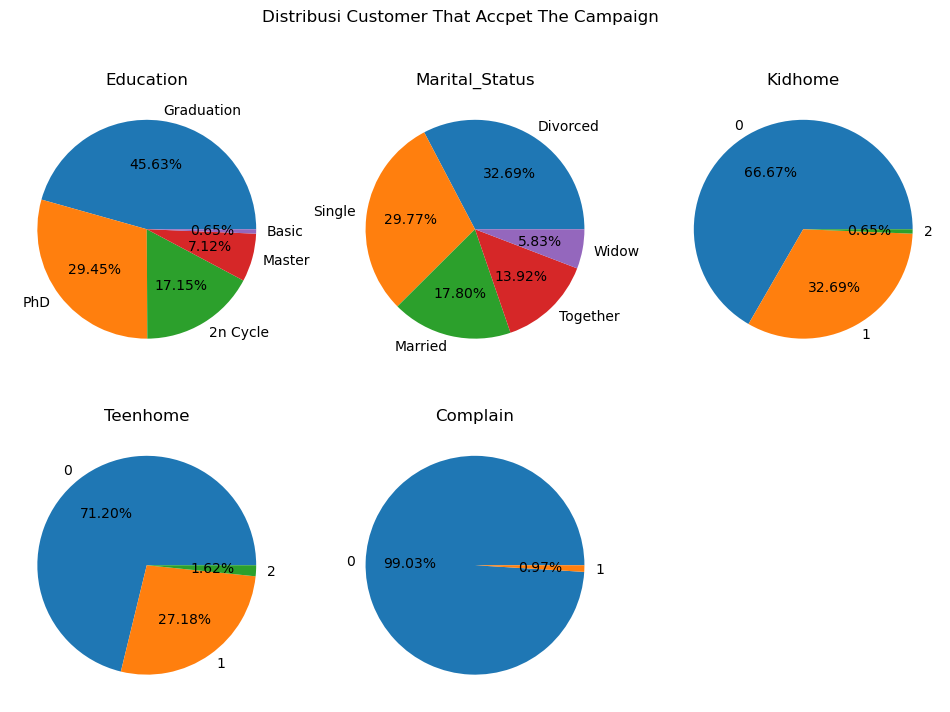

In [84]:
# Query dataset where customer accept the promotion
df_accept = df[df['Response']==1][['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Complain']]

# Make a figure
plt.figure(figsize=[12,8])
count = 231

# Looping dataframe for visualize percentage of the data
for i in df_accept.columns:
    plt.subplot(count)
    label = df[i].unique()
    plt.pie(x=df_accept[i].value_counts(), labels=label, autopct="%.2f%%")
    plt.title(i)
    count += 1
plt.suptitle('Distribusi Customer That Accpet The Campaign')
plt.show()

Dari hasil plot diatas, beberapa informasi yang dapat diambil adalah sbb :
- Customer yang menerima tawaran diskon paling banyak memiliki jenjang pendidikan `Sarjana (Graduation)` dan paling sedikit adalah `Master`
- Sedangkan berdasarkan status pernikahan paling banyak di terima oleh cutomer yang `single` ataupun `bercerai`
- Dari sisi jumlah `anak - anak dan remaja` yang, customer yang menerima tawaran tidak memiliki anak - anak maupun remaja.

### Denied The Campaign

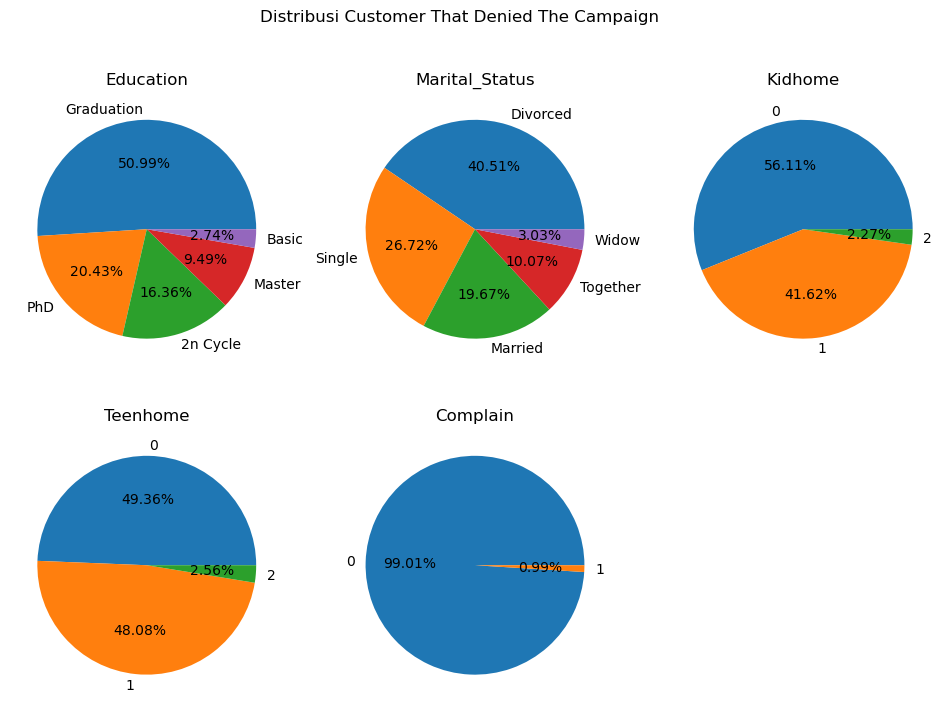

In [85]:
# Query dataset where customer denied the promotion
df_denied = df[df['Response']==0][['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Complain']]

# Make a figure
plt.figure(figsize=[12,8])
count = 231

# Looping dataframe for visualize percentage of the data
for i in df_denied.columns:
    plt.subplot(count)
    label = df[i].unique()
    
    plt.pie(x=df_denied[i].value_counts(), labels=label, autopct="%.2f%%")
    plt.title(i)
    count += 1
plt.suptitle('Distribusi Customer That Denied The Campaign')
plt.show()

Dari hasil plot diatas, beberapa informasi yang dapat diambil adalah sbb :
- Customer yang tidak menerima tawaran diskon paling banyak memiliki jenjang pendidikan `Sarjana (Graduation)` dan paling sedikit adalah `Master`
- Sedangkan berdasarkan status pernikahan paling banyak di terima oleh cutomer yang `bercerai`. Customer yang `single dan menikah` memiliki proporsi yang hampir sama.
- Dari sisi jumlah `anak - anak dan remaja` yang, customer yang tidak memiliki dan memiliki 1 anak atau remaja merupakan mayoritas yang menolak tawaran

# 5 - Data Preprocessing

Setelah memperoleh informasi pada analisa deskriptif, penulis ingin mencari korelasi antara semua kolom dengan kolom `Response`. Metode yang digunakan `feature importance dengan random forest`. Sehingga untuk sementara semua fitur akan dilakukan preprocessing

## Cek Multicolinarity
Pengecekan multicolinarity menggunakan nilai dari VIF ( Variance Inflation Factor )

In [17]:
# make vif function
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
    
# check vif value
X = df[num_col]
calc_vif(X)

,variables,VIF
0,Year_Birth,30.19
1,Income,10.69
2,Recency,3.85
3,MntWines,4.68
4,MntFruits,2.76
5,MntMeatProducts,4.29
6,MntFishProducts,3.04
7,MntSweetProducts,2.67
8,MntGoldProds,2.52
9,NumDealsPurchases,3.26


Dari hasil pengecekan diperoleh bahwa `Year Birth` Memiliki Nilai Multicolinarity Yang tinggi sehingga akan di lakukan `dropping`

In [18]:
# Drop colum Year Birth
df = df.drop(columns=['Year_Birth'])

In [19]:
# Update num_col after droping Year Birth
num_col = num_col[1:15]

In [20]:
# Check Kembali Multicolinarity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = df[num_col]
calc_vif(X)

,variables,VIF
0,Income,7.53
1,Recency,3.43
2,MntWines,4.34
3,MntFruits,2.76
4,MntMeatProducts,4.27
5,MntFishProducts,3.03
6,MntSweetProducts,2.67
7,MntGoldProds,2.52
8,NumDealsPurchases,3.24
9,NumWebPurchases,5.89


Setelah dilakukan droping kolom Year Birth, Diperoleh semua fitur numerikal tidak ada yang mengandung nilai antar satu dengan yang lain

## High Cardinality Handling
Selanjutnya dilakukan adalah pengecekan cardinality pada data kategorikal.

In [21]:
# Cek unique value categorical column
for i in df[cat_col]:
    print(f'{i}\nmemiliki jumlah unik value {df[i].nunique()}')

Education
memiliki jumlah unik value 5
Marital_Status
memiliki jumlah unik value 8
Kidhome
memiliki jumlah unik value 3
Teenhome
memiliki jumlah unik value 3
Response
memiliki jumlah unik value 2
Complain
memiliki jumlah unik value 2


Seluruh data kategorikal memiliki jumlah unik value maksimal 5 kecuali `Status Pernikahan`. Sehingga akan dilakukan handling high cardinality pada Fitur ini

In [22]:
# Check distribusi unique value marital_status
df.Marital_Status.value_counts()

Married     788
Together    514
Single      439
Divorced    216
Widow        70
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

Marital Status `YOLO, ALone, Absurd` dapat dilakukan `dropping` karena memiliki jumlah data yang cukup `kecil` dan tidak dapat digabungkan dengan yang lain

In [23]:
# Droping with index
df = df.drop(index=df[df['Marital_Status'].isin(['Alone', 'YOLO', 'Absurd'])].index)

In [24]:
# Cek agian unique value categorical column
for i in df[cat_col]:
    print(f'{i}\nmemiliki jumlah unik value {df[i].nunique()}')

Education
memiliki jumlah unik value 5
Marital_Status
memiliki jumlah unik value 5
Kidhome
memiliki jumlah unik value 3
Teenhome
memiliki jumlah unik value 3
Response
memiliki jumlah unik value 2
Complain
memiliki jumlah unik value 2


## Splitting Train Test
Karena data imbalance maka split data mempertimbangkan persentase imbalance data dengan mengatur parameter `stratify` pada fungsi train tes split

In [25]:
# Pisahkan data train dan data test dengan train test split
data_train, data_test = train_test_split(df, test_size=0.2, random_state=6645, stratify=df['Response'])
print(f"train size : {data_train.shape}")
print(f"test size : {data_test.shape}")

train size : (1621, 19)
test size : (406, 19)


In [26]:
# Reset Index data train dan data test
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

## Handling Outlier
Beberapa algoritma machine learning senstif terhadap outlier sehinggal dilakukan handling outlier berdasarkan distribusi datanya

### Nilai Skew Fitur Numerikal

In [27]:
# Looping untuk menghitung nilai skew fitur numerikal
for i in num_col:
        print(f'Nilai Skew {i} : {data_train[i].skew()}')

Nilai Skew Income : 7.830172287161637
Nilai Skew Recency : 0.03287120251184007
Nilai Skew MntWines : 1.1920783480774368
Nilai Skew MntFruits : 2.174185824479511
Nilai Skew MntMeatProducts : 2.1447059826551125
Nilai Skew MntFishProducts : 1.9419525870053693
Nilai Skew MntSweetProducts : 2.1479852265159187
Nilai Skew MntGoldProds : 1.918506691826854
Nilai Skew NumDealsPurchases : 2.3688851534662447
Nilai Skew NumWebPurchases : 1.3779862474633306
Nilai Skew NumCatalogPurchases : 2.1435009945886523
Nilai Skew NumStorePurchases : 0.7137946644466147
Nilai Skew NumWebVisitsMonth : 0.38825132923311245


Dari hasil pengecekan, semua data numerik memiliki distribusi `tidak normal`. Sebelum melakukan pengecekan outlier, penulis mencoba melakukan `feature engineering` agar distribusi datanya `normal`. Ada banyak methode yang dapat dilakukan, salah satunya adalah dengan `transformasi logaritma`

### Log transform

In [28]:
# copy data_train to data_train log
data_train_log = data_train.copy()

# Looping for logaritmik transform
for x in num_col:
    data_train_log[x] = data_train_log[x].map(lambda i: np.log(i) if i > 0 else 0)


# copy data_test to data_test log
data_test_log = data_test.copy()

# Looping for logaritmik transform
for x in num_col:
    data_test_log[x] = data_test_log[x].map(lambda i: np.log(i) if i > 0 else 0)

In [29]:
# Looping untuk menghitung nilai skew fitur numerikal data train
for i in num_col:
        print(f'Nilai Skew {i} : {data_train_log[i].skew()}')

Nilai Skew Income : -1.2097285630762793
Nilai Skew Recency : -1.5906150973600932
Nilai Skew MntWines : -0.6186874831157851
Nilai Skew MntFruits : 0.15849008640556417
Nilai Skew MntMeatProducts : -0.16622752474535338
Nilai Skew MntFishProducts : 0.04749534473647156
Nilai Skew MntSweetProducts : 0.17232942580334648
Nilai Skew MntGoldProds : -0.39863326234557933
Nilai Skew NumDealsPurchases : 0.6250386446804176
Nilai Skew NumWebPurchases : -0.24762331673026072
Nilai Skew NumCatalogPurchases : 0.6108225007662555
Nilai Skew NumStorePurchases : -0.07922268464063535
Nilai Skew NumWebVisitsMonth : -1.1510990863069734


Dari hasil transformasi, diperoleh data dengan distribusi yang `relatif normal`. Hanya tersisa beberapa kolom yang memiliki distribusi tidak normal

Dari nilai skew masing masing kolom akan dijadikan acuan untuk pemillihan metode pengecekan outlier. Kolom dengan nilai skew `lebih dari 0.5 dan kurang dari -0.5` adalah kolom dengan `distribusi tidak normal` dan akan dilakukan pengecekan dengan metode `tukey's rule`. Sedangkan yang lainnya memilliki `distribusi normal` dilakukan pengecekan dengan `Z-Score`

In [30]:
# Buat fungsi untuk cek outlier
def cek_outlier(data,col):
  skew = data[col].skew()
  if skew>=-0.5 and skew<=0.5:
    upper_boundary = data[col].mean() + 3*data[col].std()
    lower_boundary = data[col].mean() - 3*data[col].std()
  else:
    Q1 = np.quantile(data[col], 0.25)
    Q3 = np.quantile(data[col], 0.75)
    IQR =  Q3 - Q1
    upper_boundary = Q3 + 1.5 * IQR
    lower_boundary = Q1 - 1.5 * IQR
  
  outliers = data[(data[col]<lower_boundary) | (data[col]>upper_boundary)]
  data_clean = data[(data[col]>=lower_boundary) & (data[col]<=upper_boundary)]
  outliers_percent = len(outliers) / len(data) * 100

  return data_clean, outliers, outliers_percent

In [31]:
# Make variabel for feature with ouliers more and less than 5%
under_5 = []
over_5 = []

# Looping data train numerikal
for i in num_col:
    data_clean, outliers, outliers_percent = cek_outlier(data_train_log, i)
    if outliers_percent < 5:
        under_5.append(i)
    else:
        over_5.append(i)

# Print feature with outlier less than 5%
print(f'Kolom dengan persentase outlier Under 5 %')
for i in under_5:
    data_clean, outliers, outliers_percent = cek_outlier(data_train_log, i)
    print(f'{i}  = {outliers_percent:.2f} %')

# Print feature with outlier more than 5%
print(f'\nKolom dengan persentase outlier Over 5 %')
for i in over_5:
    data_clean, outliers, outliers_percent = cek_outlier(data_train_log, i)
    print(f'{i}  = {outliers_percent:.2f} %')

Kolom dengan persentase outlier Under 5 %
Income  = 1.97 %
Recency  = 4.81 %
MntWines  = 0.00 %
MntFruits  = 0.00 %
MntMeatProducts  = 0.00 %
MntFishProducts  = 0.00 %
MntSweetProducts  = 0.00 %
MntGoldProds  = 0.00 %
NumDealsPurchases  = 0.00 %
NumWebPurchases  = 0.00 %
NumCatalogPurchases  = 0.00 %
NumStorePurchases  = 0.00 %
NumWebVisitsMonth  = 0.00 %

Kolom dengan persentase outlier Over 5 %


Setelah mengelompokkan feature berdasarkan persentase outlier, kemudian melakukan handling outlier sebagai berikut :
- Less than 5%
    - Trimming from data set
- More than 5%
    - Capping with winsorizer. Capping method is `iqr` because distributin of the data is skewed and fold is `1.5` for moderate skew

In [32]:
# Trimming outlier for column with outliers under 5%
for i in under_5:
    data_train_clean, outliers, outliers_percent = cek_outlier(data_train_log, i)

In [33]:
# Capping outliers for column with outliers over 5%
capper = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['Recency'])
capper.fit(data_train_log)
data_train_clean = capper.transform(data_train_log)

## Handling Missing Values
Seletah handling outlier, selanjutnya pengecekan missing value dan kemudian dilakukan handling apabila ditemukan missing value

In [34]:
# Check Missing Values pada data train
num_miss_val = 0
for i in df:
    miss_val = data_train_clean[i].isnull().sum()
    if miss_val > 0:
        print(i, ' : ', miss_val)
        print(f'Percentage of missing value {i} : {miss_val/len(data_train_clean[i].values):.2f}%')
        num_miss_val += 1

if num_miss_val == 0:
    print('Tidak Ada Missing Value')

Tidak Ada Missing Value


In [35]:
# Check Missing Values pada data test
num_miss_val = 0
for i in df:
    miss_val = data_test[i].isnull().sum()
    if miss_val > 0:
        print(i, ' : ', miss_val)
        print(f'Percentage of missing value {i} : {miss_val/len(data_test[i].values):.2f}%')
        num_miss_val += 1

if num_miss_val == 0:
    print('Tidak Ada Missing Value')

Tidak Ada Missing Value


> Dari pengecekan `data train` dan `data test` tidak ditemukan kolom yang memiliki `missing value`

## Splitting Fitur Target

> Setelah dataset bersih dari outlier dan missing value, selanjutnya memisahkan `fitur` dengan `target` dari masing masing `data train` dan `data test`

In [36]:
# Split  `X` (Features) dan `y` (Target) pada Data Train

X_train = data_train_clean.drop('Response', axis=1)
y_train = data_train_clean['Response']
X_train.head(3)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,Graduation,Divorced,10.52,1,1,4.28,3.76,1.39,2.48,2.08,0.00,3.30,1.61,0.69,0.00,1.39,1.61,0
1,Graduation,Single,11.19,0,1,3.33,6.26,0.00,6.26,5.42,4.79,4.90,0.69,1.79,2.20,1.61,0.69,0
2,Graduation,Married,10.46,1,1,4.13,3.33,3.14,3.37,3.37,2.64,3.85,1.10,0.69,0.00,1.39,1.79,0


In [37]:
# Split  `X` (Features) dan `y` (Target) pada Data Test

X_test = data_test_log.drop('Response', axis=1)
y_test = data_test_log['Response']
X_test.head(3)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,Graduation,Married,10.37,1,0,4.29,3.56,1.10,3.00,1.39,0.00,3.00,0.69,0.69,0.00,1.10,2.20,0
1,Master,Single,10.71,0,0,4.26,6.75,2.30,4.96,2.56,2.30,3.00,0.69,2.20,1.39,2.48,2.08,0
2,Graduation,Single,11.01,0,1,4.36,6.25,3.00,5.91,3.66,4.39,3.69,0.69,1.79,1.10,1.79,1.61,0


## Split between Numerik Columns and String Columns

Memisahkan kolom yang masih berbentuk string dengan yang sudah berbentuk numerik untuk dilakukan encoding pada data string dan scalling pada data numerik.

In [38]:
# separate numerikal and string type
numerik = X_train.select_dtypes(include=np.number).columns.tolist()
string = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', numerik)
print('\nCategorical Columns : ', string)

Numerical Columns :  ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']

Categorical Columns :  ['Education', 'Marital_Status']


## Feature Scaling

In [39]:
# Tampilkan numerikal data train
X_train[numerik].head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,10.52,1,1,4.28,3.76,1.39,2.48,2.08,0.00,3.30,1.61,0.69,0.00,1.39,1.61,0
1,11.19,0,1,3.33,6.26,0.00,6.26,5.42,4.79,4.90,0.69,1.79,2.20,1.61,0.69,0
2,10.46,1,1,4.13,3.33,3.14,3.37,3.37,2.64,3.85,1.10,0.69,0.00,1.39,1.79,0


> Karena distribusi data pada fitur `numerikal` sudah `normal`, maka scaling dilakukan dengan menggunakan `StandarScaler`

In [40]:
# Feature Scaling using Standard Karena Distribusi Sudah Memiliki Distribusi Normal

scaler = StandardScaler()
feature_names = scaler.get_feature_names_out(input_features=numerik)

X_train_num_scaled = scaler.fit_transform(X_train[numerik])
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=feature_names)

X_test_num_scaled = scaler.transform(X_test[numerik])
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=feature_names)

X_train_num_scaled.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,-0.43,1.02,0.88,0.76,-0.44,-0.41,-0.95,-0.19,-1.25,0.22,1.51,-0.66,-0.90,-0.35,0.13,-0.10
1,0.86,-0.83,0.88,-0.30,0.87,-1.26,1.35,1.77,1.62,1.37,0.11,0.86,1.85,0.04,-1.40,-0.10
2,-0.55,1.02,0.88,0.60,-0.66,0.65,-0.41,0.56,0.33,0.62,0.73,-0.66,-0.90,-0.35,0.43,-0.10


## Feature Encoding
Terdapat 2 jenis data categorical string yaitu education dan marital status. Dimana education memiliki tingkatan sehingga dilakukan encoding dengan Ordinal Encoder dan Marital status tidak memiliki tingkatan sehingga dilakukan dengan One Hot Encoder

In [41]:
# Tampilkan data train berbentuk string
X_train[string].head(3)

,Education,Marital_Status
0,Graduation,Divorced
1,Graduation,Single
2,Graduation,Married


In [42]:
# Feature Encoding menggunakan OneHotEncoder dan OrdinalEcoder

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_cat_ohe = ohe.fit_transform(X_train[['Marital_Status']])
feature_names_ohe = ohe.get_feature_names_out(input_features=['Marital_Status'])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe, columns=feature_names_ohe)

X_test_cat_ohe = ohe.transform(X_test[['Marital_Status']])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe, columns=feature_names_ohe)

# make categories for ordinal encoder
edu = ['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']

ode = OrdinalEncoder(categories=[edu])
X_train_cat_ode = ode.fit_transform(X_train[['Education']])
X_train_cat_ode = pd.DataFrame(X_train_cat_ode, columns=['Education'])

X_test_cat_ode = ode.transform(X_test[['Education']])
X_test_cat_ode = pd.DataFrame(X_test_cat_ode, columns=['Education'])

X_train_cat_encoded = pd.concat([X_train_cat_ode, X_train_cat_ohe], axis=1)
X_test_cat_encoded = pd.concat([X_test_cat_ode, X_test_cat_ohe], axis=1)


# X_test_cat_encoded
X_train_cat_encoded.head(3)

,Education,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1.00,1.00,0.00,0.00,0.00,0.00
1,1.00,0.00,0.00,1.00,0.00,0.00
2,1.00,0.00,1.00,0.00,0.00,0.00


## Making Final Data

Menggabungkan data numerikal yang sudah di scaling dan categorical yang sudah di encode

In [43]:
# Gabungkan kembali fitur numerikal dan kategorial

X_train_concat = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_concat = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_concat.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,-0.43,1.02,0.88,0.76,-0.44,-0.41,-0.95,-0.19,-1.25,0.22,1.51,-0.66,-0.90,-0.35,0.13,-0.10,1.00,1.00,0.00,0.00,0.00,0.00
1,0.86,-0.83,0.88,-0.30,0.87,-1.26,1.35,1.77,1.62,1.37,0.11,0.86,1.85,0.04,-1.40,-0.10,1.00,0.00,0.00,1.00,0.00,0.00
2,-0.55,1.02,0.88,0.60,-0.66,0.65,-0.41,0.56,0.33,0.62,0.73,-0.66,-0.90,-0.35,0.43,-0.10,1.00,0.00,1.00,0.00,0.00,0.00


## Feature Importance Random Forest

In [44]:
# Make a random forest model
select_feature = RandomForestClassifier(random_state=42)
# Train model with data train
select_feature.fit(X_train_concat, y_train)

RandomForestClassifier(random_state=42)

In [45]:
# Pulling out feature importance
feature_imp = list(zip(X_train_concat.columns, select_feature.feature_importances_))

# Make feature importance into dataframe
feature_imp_df = pd.DataFrame(feature_imp, columns =['Feature', 'Importance'])
feature_imp_df.sort_values('Importance', ascending=False)

,Feature,Importance
4,MntWines,0.11
3,Recency,0.10
0,Income,0.10
6,MntMeatProducts,0.10
9,MntGoldProds,0.08
8,MntSweetProducts,0.06
7,MntFishProducts,0.06
14,NumWebVisitsMonth,0.06
5,MntFruits,0.05
13,NumStorePurchases,0.05


Dari feature importance diatas penulis memutuskan untuk mengambil fitur dengan nilai `feature importance lebih dari 0.04` sehingga diperoleh `14 Fitur`

In [46]:
# make final feature from feature importance
final_feature = ['MntWines', 'Recency', 'Income', 'MntMeatProducts',
       'MntGoldProds', 'MntSweetProducts', 'MntFishProducts', 'NumWebVisitsMonth',
       'MntFruits', 'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumDealsPurchases', 'Education']
      
X_train_final = X_train_concat[final_feature]
y_train_final = y_train

X_test_final = X_test_concat[final_feature]

X_train_final.head(3)

,MntWines,Recency,Income,MntMeatProducts,MntGoldProds,MntSweetProducts,MntFishProducts,NumWebVisitsMonth,MntFruits,NumStorePurchases,NumWebPurchases,NumCatalogPurchases,NumDealsPurchases,Education
0,-0.44,0.76,-0.43,-0.95,0.22,-1.25,-0.19,0.13,-0.41,-0.35,-0.66,-0.90,1.51,1.00
1,0.87,-0.30,0.86,1.35,1.37,1.62,1.77,-1.40,-1.26,0.04,0.86,1.85,0.11,1.00
2,-0.66,0.60,-0.55,-0.41,0.62,0.33,0.56,0.43,0.65,-0.35,-0.66,-0.90,0.73,1.00


##  Principal Componen Analysis (PCA)
Dari 14 feature yang dipilh berdasarkan nilai feature importance nya, penulis mencoba mencoba mengerucutkan jumlahnya dengan melihat persentase informasi yang masih terkkandung dengan penggunankan metode PCA

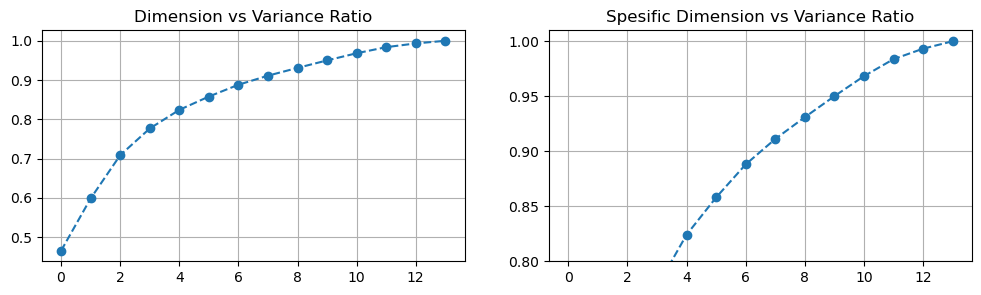

In [47]:
# Define PCA
reduce_dim =PCA()

# Fit data on PCA
reduce_dim.fit(X_train_final)
cumsum = np.cumsum(reduce_dim.explained_variance_ratio_)

# Make a figure for Dimensionality Reduction Visualize
plt.figure(figsize=[12,3])
plt.subplot(121)
plt.plot(cumsum,'o--')
plt.title('Dimension vs Variance Ratio')
plt.grid()

# Specific on 0,8 until 1 Variance Ratio
plt.subplot(122)
plt.plot(cumsum,'o--')
plt.title('Spesific Dimension vs Variance Ratio')
plt.ylim(bottom=0.8, top=1.01)
plt.grid()
plt.show()

Dari Hasil visualisasi, penulis memutuskan untuk mereduksi menjadi `5 kolom` dengan informasi yang tersisa `86%`

In [48]:
# define reducer
pca = PCA(n_components=5, random_state=43).fit(X_train_final)

# transform x_train dan x_test
X_train_final = pca.transform(X_train_final)
X_test_final = pca.transform(X_test_final)

# 6 - Model Definition

Untuk menentukan algoritma model yang akan di pakai, penulis melakukan `cross validation` pada beberapa `algoritma supervised learning` dengan `default parameter` dari masing masing algoritma kemudian `memilih` algoritma yang memiliki rata rata score `paling tinggi`.

Scoring dilakukan dengan menggunakan `fbeta_score`. Karena menurut personal judgement penulis, kedua kelompok customer baik yang menerima maupun yang menolak tawaran harus di pertimbangkan dan semaksimal mungkin menghindari kesalahan prediksi. Hal ini karena :
- Apabila model memprediksi customer `menerima` namun sebenarnya `menolak`, maka terdapat `kesia-siaan (losses)` resource dari superstoe
- Sedangkan sebaliknya model memprediksi customer akan `menolak` namun ternyata `menerima`, maka superstore `kehilangan peluang` 

Meski sama sama penting, namun lebih krusial apabila model salah memprediksi dan superstore kehilangan peluang. Oleh karena itu diberikan pembobotan pada kondisi tersebut lebih besar. Sehingga digunakan metode scorring fbeta_score yang mana memiliki kemampuan untuk mengatur pembebanan tersebut.


## Cross Validation Beberapa Model

In [49]:
# ignore warning
filterwarnings('ignore')

# make scorer with fbeta
f2 = make_scorer(fbeta_score, beta=0.5, average='weighted')

# make cross validation condition
cv = StratifiedKFold(n_splits=3, random_state = 134, shuffle= True )

# make all model into list
all_model = [LogisticRegression(random_state=42), SVC(random_state=42), DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),
 KNeighborsClassifier(), GaussianNB(), XGBClassifier(random_state=42)]

best_model = []
best_score = 0

# looping all model and search best score
for i in all_model:
    model = i
    model_cv =cross_val_score(model, X_train_final, y_train_final, cv=cv, scoring=f2)
    if model_cv.mean() > best_score:
        best_model = i
        best_score = model_cv.mean()

    print(f'\nModel {i}')
    print('Recall Score - All - Cross Validation  : ', model_cv)
    print('Recall Score - Mean - Cross Validation : ', model_cv.mean())
    print('Recall Score - Std - Cross Validation  : ', model_cv.std())
    print('Recall Score - Range of Test-Set       : ', (model_cv.mean()-model_cv.std()) , '-', (model_cv.mean()+model_cv.std()))

print(f'\nBest Model : {best_model}')
print(f'Best Score : {best_score}')


Model LogisticRegression(random_state=42)
Recall Score - All - Cross Validation  :  [0.78170195 0.74411905 0.75758837]
Recall Score - Mean - Cross Validation :  0.7611364596847201
Recall Score - Std - Cross Validation  :  0.015546926218814108
Recall Score - Range of Test-Set       :  0.745589533465906 - 0.7766833859035343

Model SVC(random_state=42)
Recall Score - All - Cross Validation  :  [0.73938563 0.74188665 0.74188665]
Recall Score - Mean - Cross Validation :  0.7410529802931829
Recall Score - Std - Cross Validation  :  0.0011789921697225193
Recall Score - Range of Test-Set       :  0.7398739881234604 - 0.7422319724629054

Model DecisionTreeClassifier(random_state=42)
Recall Score - All - Cross Validation  :  [0.78163907 0.76558963 0.76116618]
Recall Score - Mean - Cross Validation :  0.7694649601460984
Recall Score - Std - Cross Validation  :  0.008795773361188388
Recall Score - Range of Test-Set       :  0.76066918678491 - 0.7782607335072869

Model RandomForestClassifier(rando

Dari Nilai Rata - rata skor pada Cross Validation Diperoleh 4 Algoritma yang memiliki skor tertinggi yaitu :
1. XGBClassifier `0.79`
2. RandomForestClassifier `0.78`
3. KNeares Neighbor `0.0.77`
4. Decision Tree Classifier `0.0.76`

Kemepat model di atas akan dilakukan prediksi dengan hyperparameter default dan kemudian akan dilakukan tuning atau pruning agar performa lebih maksimal

## Model Definition

In [50]:
# make scaling column
col_scale = ['MntWines', 'Recency', 'Income', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFishProducts', 'NumWebVisitsMonth',
             'MntFruits', 'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumDealsPurchases']

# make encode column
col_encode = ['Education']

# Make column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", scaler, col_scale),
        ("encode", ode, col_encode)
        ])

# Make a model with pipeline for baseline parameter
xgb_model = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca), ('xgb', XGBClassifier(random_state=42))])
rfc_model = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca), ('rfc', RandomForestClassifier(random_state=42))])
knn_model = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca), ('knn', KNeighborsClassifier())])
dtc_model = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca), ('dtc', DecisionTreeClassifier(random_state=42))])

# 7 - Model Training

In [51]:
# Train final model with baseline
final_model = [xgb_model, rfc_model, knn_model, dtc_model]

for i in final_model:
    i.fit(X_train[final_feature], y_train)

[21:42:21] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# 8 - Model Evaluation

Scoring dilakukan dengan menggunakan `fbeta_score`. Karena menurut personal judgement penulis, kedua kelompok customer baik yang menerima maupun yang menolak tawaran harus di pertimbangkan dan semaksimal mungkin menghindari kesalahan prediksi. Hal ini karena :
- Apabila model memprediksi customer `menerima` namun sebenarnya `menolak`, maka terdapat `kesia-siaan (losses)` resource dari superstoe
- Sedangkan sebaliknya model memprediksi customer akan `menolak` namun ternyata `menerima`, maka superstore `kehilangan peluang` 

Meski sama sama penting, namun lebih krusial apabila model salah memprediksi dan superstore kehilangan peluang. Oleh karena itu diberikan pembobotan pada kondisi tersebut lebih besar. Sehingga digunakan metode scorring fbeta_score yang mana memiliki kemampuan untuk mengatur pembebanan tersebut.

## Predict Data

In [52]:
# Predict Data Train and Data Test with xgb
y_pred_train_xgb = xgb_model.predict(X_train[final_feature])
y_pred_test_xgb = xgb_model.predict(X_test)

# Predict Data Train and Data Test with random forest
y_pred_train_rfc = rfc_model.predict(X_train[final_feature])
y_pred_test_rfc = rfc_model.predict(X_test)

# Predict Data Train and Data Test with knn
y_pred_train_knn = knn_model.predict(X_train[final_feature])
y_pred_test_knn = knn_model.predict(X_test)

# Predict Data Train and Data Test decision tree
y_pred_train_dtc = dtc_model.predict(X_train[final_feature])
y_pred_test_dtc = dtc_model.predict(X_test)


## F Beta Score

Sesuai penjelasan sebelumnya, bahwa scoring yang digunakan adalah fbeta. Berikut adalah masing - masing performa model dengan parameter baseline

### Model XGBoost

In [53]:
# Fbeta for XGBoost model
print('-'*20, 'XGBClassifier', '-'*20)
print(f"fbeta_score Data Train = {fbeta_score(y_train_final, y_pred_train_xgb, average='weighted', beta=0.5):.4f}")
print(f"fbeta_score Data Test = {fbeta_score(y_test, y_pred_test_xgb, average='weighted', beta=0.5):.4f}")

-------------------- XGBClassifier --------------------
fbeta_score Data Train = 0.9932
fbeta_score Data Test = 0.7732


### Model Random Forest

In [54]:
# Fbeta for Random Forest model
print('-'*20, 'RandomForestClassifier', '-'*20)
print(f"fbeta_score Data Train = {fbeta_score(y_train_final, y_pred_train_rfc, average='weighted', beta=0.5):.4f}")
print(f"fbeta_score Data Test = {fbeta_score(y_test, y_pred_test_rfc, average='weighted', beta=0.5):.4f}")

-------------------- RandomForestClassifier --------------------
fbeta_score Data Train = 0.9932
fbeta_score Data Test = 0.7971


### Model KNN

In [55]:
# Fbeta for KNN model
print('-'*20, 'KNeighborsClassifier', '-'*20)
print(f"fbeta_score Data Train = {fbeta_score(y_train_final, y_pred_train_knn, average='weighted', beta=0.5):.4f}")
print(f"fbeta_score Data Test = {fbeta_score(y_test, y_pred_test_knn, average='weighted', beta=0.5):.4f}")

-------------------- KNeighborsClassifier --------------------
fbeta_score Data Train = 0.8398
fbeta_score Data Test = 0.8052


### Model Decision Tree

In [56]:
# Fbeta for Decision Tree model
print('-'*20, 'Decision Tree Classifier', '-'*20)
print(f"fbeta_score Data Train = {fbeta_score(y_train_final, y_pred_train_dtc, average='weighted', beta=0.5):.4f}")
print(f"fbeta_score Data Test = {fbeta_score(y_test, y_pred_test_dtc, average='weighted', beta=0.5):.4f}")

-------------------- Decision Tree Classifier --------------------
fbeta_score Data Train = 0.9932
fbeta_score Data Test = 0.7612


Dari semua model diatas, Memiliki score yang cukup baik pada data train mamupun pada data test. Namun terdapat perbedaan ayang cukup signifikan antara data train dan data test kecuali model KNN. Artinya kecuali model KNN memiliki predikat `Over-fit`. Karena model diatas masih menggunakan hyperparameter default, maka akan dilakukan `hyperparameter tuning` maupun `pruning` agar diperoleh model yang memiliki predikat `best-fit`

## Hyperparrameter Tuning Or Model Pruning

### XGBoost
Pada xboost akan dilakukan hyper parameter tuning. Salah satu parameternya adalah weight scale yang mana menentukan persentase pembelajarn masing masing kelas pada kolom response

In [57]:
# Make a weight scale
weight_scale = int(y_train.value_counts()[0]/y_train.value_counts()[1])

In [58]:
# Make a hyper parameter combination
param_xgb =   {'xgb__max_depth': [3, 5, 7, 9, 11, 13], 
              'xgb__min_child_weight': [1, 3, 5, 7, 9], 
              'xgb__subsample': [0.5, 0.7, 0.9, 1.1, 1.3], 
              'xgb__colsample_bytree': [0.5, 0.7, 0.9, 1.1, 1.3], 
              'xgb__reg_alpha': [0, 0.1, 0.5, 1, 1.5], 
              'xgb__reg_lambda': [0, 0.1, 0.5, 1, 1.5],
              'xgb__learning_rate' : [0.01, 0.05, 0.1, 0.5, 1],
              'xgb__scale_pos_weight' : [weight_scale],
              'xgb__ccp_alpha' : [0.0085]
             }

In [59]:
# random search with xgboost
xgb_random = RandomizedSearchCV(xgb_model, param_distributions=param_xgb, random_state=43, cv=cv, n_jobs=-1, n_iter=400, scoring=f2)
xgb_random.fit(X_train[final_feature], y_train)

[21:42:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "ccp_alpha" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:42:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=134, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('scale',
                                                                               StandardScaler(),
                                                                               ['MntWines',
                                                                                'Recency',
                                                                                'Income',
                                                                                'MntMeatProducts',
                                                                                'MntGoldProds',
                                                                                'MntSweetProducts',
                                                                                'MntFishProducts',
   

In [60]:
# best score dan best parameter xbgboost
print(f"xgb Best Score = {xgb_random.best_score_:.4f}")
print(f"xgb Best Parameters = {xgb_random.best_params_}")

xgb Best Score = 0.8016
xgb Best Parameters = {'xgb__subsample': 0.7, 'xgb__scale_pos_weight': 5, 'xgb__reg_lambda': 0.5, 'xgb__reg_alpha': 1, 'xgb__min_child_weight': 3, 'xgb__max_depth': 11, 'xgb__learning_rate': 0.1, 'xgb__colsample_bytree': 0.9, 'xgb__ccp_alpha': 0.0085}


In [61]:
# predict data test xgb
y_pred_test_xgb_tuning = xgb_random.predict(X_test)

# compare best score and data test xgb
print(f"Xgb Best Score {xgb_random.best_score_:.4f}")
print(f"Xgb Score On Data Test {fbeta_score(y_test, y_pred_test_xgb_tuning, average='weighted', beta=0.5):.4f}")

Xgb Best Score 0.8016
Xgb Score On Data Test 0.7882


### Random Forest
Mengatasi overfitting pada random forest dapat dilakuan Melalui post pruning. Salah satu metode post pruning adalah Cost Complexity Path dengan menggunakan nilai cost complexity alpha

#### CCP Alpha

In [62]:
# Search ccp alpha from ccp path
tree = DecisionTreeClassifier()
tree.fit(X_train_final, y_train_final)

DecisionTreeClassifier()

In [63]:
# ccp_path from decision tree
ccp_path  = tree.cost_complexity_pruning_path(X_train_final,y_train_final)

# Extractt ccp_alphas from ccp_path
ccp_alphas, impurities = ccp_path.ccp_alphas, ccp_path.impurities

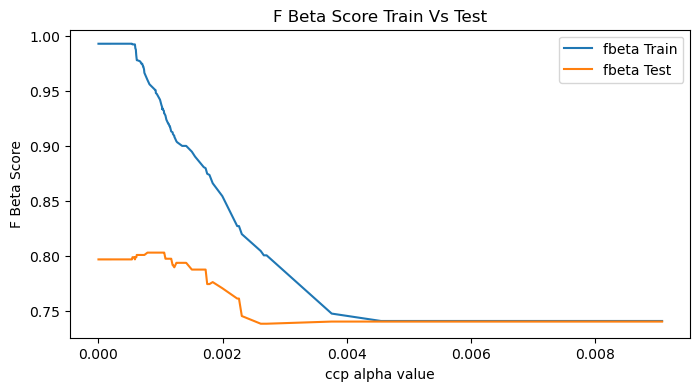

In [64]:
# variabel for scoring with every ccp_alpha value
fbeta_train = []
fbeta_test = []

# Loop train and predict for every value of ccp alpha
for i in ccp_alphas:
    model = RandomForestClassifier(ccp_alpha=i, random_state=42)
    model.fit(X_train_final,y_train_final)
    y_pred_train = model.predict(X_train_final)
    y_pred_test = model.predict(X_test_final)

    fbeta_train.append(fbeta_score(y_train_final,y_pred_train, average='weighted', beta=0.5))
    fbeta_test.append(fbeta_score(y_test, y_pred_test, average='weighted', beta=0.5))

# Visualize fbeta score vs ccp alpha value
plt.figure(figsize=[8,4])
sns.lineplot(y=fbeta_train, x=ccp_alphas, label='fbeta Train')
sns.lineplot(y=fbeta_test, x=ccp_alphas, label='fbeta Test')
plt.title('F Beta Score Train Vs Test')
plt.xlabel('ccp alpha value')
plt.ylabel('F Beta Score')
plt.show()

Dari hasil plot diatas diperoleh informasi bahwa performa data train dan data test akan sama pada `ccp alpha lebih dari 0.004`. Namun pada kondisi tersebut performa model sudah cukup jauh yaitu hanya `0.75`. Sedangkan model masih dapat memiliki performas yang lebih tinggi yaitu pada `0.80 namun akan mengalami overfit`.

Penulis memutuskan memilih nilai ccp alpha pada performa yang `tinggi` meski akan mengalami overfit. Karena fokus utama adalah mencari `performa model sebaik baiknya`.

Sehingga diperoleh nilai ccp alpha adalah `0.0009`

#### Random Search Random Forest 
Kemudian penulis mengkombinasikan pruning dengan hyper parameter tuning lainnya menggunakan random search

In [65]:
# Make parameter for random forest
param_rfc ={  
              'rfc__max_depth': [5, 10, 15, 20], 
              'rfc__min_samples_split': [2, 5, 10], 
              'rfc__min_samples_leaf': [1, 2, 4], 
              'rfc__max_features': ['auto', 'sqrt', 'log2'], 
              'rfc__ccp_alpha': [0.0009]
             }


In [66]:
# Random search for random forest
rfc_random = RandomizedSearchCV(rfc_model, param_distributions=param_rfc, n_iter=200, random_state=2023 ,cv=cv, n_jobs=-1, scoring=f2)
rfc_random.fit(X_train[final_feature], y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=134, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('scale',
                                                                               StandardScaler(),
                                                                               ['MntWines',
                                                                                'Recency',
                                                                                'Income',
                                                                                'MntMeatProducts',
                                                                                'MntGoldProds',
                                                                                'MntSweetProducts',
                                                                                'MntFishProducts',
   

In [67]:
# Best score and parameter random forest with Random Search
print(f'Best Score Random Search Random Forest : {rfc_random.best_score_:.4f}')
print(f'Best Parameter Random Search Random Forest : \n{rfc_random.best_params_}')

Best Score Random Search Random Forest : 0.7837
Best Parameter Random Search Random Forest : 
{'rfc__min_samples_split': 2, 'rfc__min_samples_leaf': 1, 'rfc__max_features': 'auto', 'rfc__max_depth': 15, 'rfc__ccp_alpha': 0.0009}


In [68]:
# predict on data test
y_pred_test_rfc_tuning = rfc_random.predict(X_test)

# compare best score and data test
print(f'Random Forest Best Score : {rfc_random.best_score_:.4f}')
print(f"Random Forest Tuning On Data Test : {fbeta_score(y_test, y_pred_test_rfc_tuning, average='weighted', beta=0.5):.4f}")

Random Forest Best Score : 0.7837
Random Forest Tuning On Data Test : 0.7919


### KNN Model

In [69]:
# Make parameters combinataion
knn_params = { 'knn__n_neighbors' : [int(x) for x in np.linspace(start=3, stop=10, num=8)],
               'knn__weights' : ['uniform', 'distance'],
               'knn__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
               'knn__leaf_size' : [int(x) for x in np.linspace(start=10, stop=100, num=10)]
            }

In [70]:
# Gridserach Model
knn_grid = GridSearchCV(knn_model, param_grid=knn_params, cv=cv, n_jobs=-1, scoring=f2)
knn_grid.fit(X_train[final_feature], y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=134, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('scale',
                                                                         StandardScaler(),
                                                                         ['MntWines',
                                                                          'Recency',
                                                                          'Income',
                                                                          'MntMeatProducts',
                                                                          'MntGoldProds',
                                                                          'MntSweetProducts',
                                                                          'MntFishProducts',
                                                                     

In [71]:
# Best score and parameter KNN with Grid Search
print(f"KNN Best Parameters = {knn_grid.best_params_}")
print(f"KNN Best Score = {knn_grid.best_score_:.4f}")

KNN Best Parameters = {'knn__algorithm': 'auto', 'knn__leaf_size': 10, 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
KNN Best Score = 0.7774


In [72]:
# predict on data test
y_pred_test_knn_tuning = knn_grid.predict(X_test)

# compare best score and data test
print(f'KNN Best Score : {knn_grid.best_score_:.4f}')
print(f"KNN Tuning On Data Test : {fbeta_score(y_test, y_pred_test_knn_tuning, average='weighted', beta=0.5):.4f}")

KNN Best Score : 0.7774
KNN Tuning On Data Test : 0.8052


### Decision Tree Classifier

In [73]:
# make parameter combination for decision tree
param_dtc =  {'dtc__min_samples_split':  [int(x) for x in np.linspace(start=1, stop=8, num=8)], 
              'dtc__min_samples_leaf':[int(x) for x in np.linspace(start=1, stop=8, num=8)],
              'dtc__max_features': ['auto', 'sqrt', 'log2'], 
              'dtc__ccp_alpha': [0.0009],
              'dtc__class_weight' : ['balanced']
             }

In [74]:
# Random search for decision tree
dtc_random = RandomizedSearchCV(dtc_model, param_distributions=param_dtc, n_iter=100, random_state=1012 ,cv=cv, n_jobs=-1, scoring=f2)
dtc_random.fit(X_train[final_feature], y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=134, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('scale',
                                                                               StandardScaler(),
                                                                               ['MntWines',
                                                                                'Recency',
                                                                                'Income',
                                                                                'MntMeatProducts',
                                                                                'MntGoldProds',
                                                                                'MntSweetProducts',
                                                                                'MntFishProducts',
   

In [75]:
# Best score and parameter random forest with Random Search
print(f'Best Score Random Search Decision Tree : {dtc_random.best_score_:.4f}')
print(f'Best Parameter Random Search Decision Tree : \n{dtc_random.best_params_}')

Best Score Random Search Decision Tree : 0.7807
Best Parameter Random Search Decision Tree : 
{'dtc__min_samples_split': 2, 'dtc__min_samples_leaf': 2, 'dtc__max_features': 'auto', 'dtc__class_weight': 'balanced', 'dtc__ccp_alpha': 0.0009}


In [76]:
# predict on data test
y_pred_test_dtc_tuning = dtc_random.predict(X_test)

# compare best score and data test
print(f'KNN Best Score : {dtc_random.best_score_:.4f}')
print(f"KNN Tuning On Data Test : {fbeta_score(y_test, y_pred_test_dtc_tuning, average='weighted', beta=0.5):.4f}")

KNN Best Score : 0.7807
KNN Tuning On Data Test : 0.7661


Dari hasil tuning, Semua model sudah tidak megalami `overfit` namun sudah menjadi `best - fit` dengan selisih antara train dan test antara `1% - 2%`

Selanjutnya penulis membandingkan performa pada data test sebelum dan sesudah tuning

## Comparation Before And After Tuning

In [77]:
# Fbeta for XGB model on data test
print('-'*20, 'Decision XGB Data Test', '-'*20)
print(f"fbeta_score Before Tuning = {fbeta_score(y_test, y_pred_test_xgb, average='weighted', beta=0.5):.4f}")
print(f"fbeta_score After Tuning = {fbeta_score(y_test, y_pred_test_xgb_tuning, average='weighted', beta=0.5):.4f}")

-------------------- Decision XGB Data Test --------------------
fbeta_score Before Tuning = 0.7732
fbeta_score After Tuning = 0.7882


In [78]:
# Fbeta for Random Forest model on data test
print('-'*20, 'Decision Random Forest Data Test', '-'*20)
print(f"fbeta_score Before Tuning = {fbeta_score(y_test, y_pred_test_rfc, average='weighted', beta=0.5):.4f}")
print(f"fbeta_score After Tuning = {fbeta_score(y_test, y_pred_test_rfc_tuning, average='weighted', beta=0.5):.4f}")

-------------------- Decision Random Forest Data Test --------------------
fbeta_score Before Tuning = 0.7971
fbeta_score After Tuning = 0.7919


In [79]:
# Fbeta for KNN model on data test
print('-'*20, 'Decision KNN Data Test', '-'*20)
print(f"fbeta_score Before Tuning = {fbeta_score(y_test, y_pred_test_knn, average='weighted', beta=0.5):.4f}")
print(f"fbeta_score After Tuning = {fbeta_score(y_test, y_pred_test_knn_tuning, average='weighted', beta=0.5):.4f}")

-------------------- Decision KNN Data Test --------------------
fbeta_score Before Tuning = 0.8052
fbeta_score After Tuning = 0.8052


In [80]:
# Fbeta for Decision Tree model on data test
print('-'*20, 'Decision Tree Classifier Data Test', '-'*20)
print(f"fbeta_score Before Tuning = {fbeta_score(y_test, y_pred_test_dtc, average='weighted', beta=0.5):.4f}")
print(f"fbeta_score After Tuning = {fbeta_score(y_test, y_pred_test_dtc_tuning, average='weighted', beta=0.5):.4f}")

-------------------- Decision Tree Classifier Data Test --------------------
fbeta_score Before Tuning = 0.7612
fbeta_score After Tuning = 0.7661


Kesimpulan :
- Pada model `XGB` dan `Decision Tree` terdapat `kenaikan` antara model baseline dengan model yang sudah di tuning kurang lebih `1%` 
- Pada model `KNN` tidak terjadi perubahan antara sebelum dan sesudah tuning
- Sedangkan pada model `random forest` terjadi `penurunan` walau hanya `0.06%`. Hal ini dapat terjadi karena model random forest memiliki banyak hyper parameter sedangkan hyperparameter yang di tuning hanya beberapa dengan kombinasi yang tidak kompleks dikarenakan `keterbatasan device` dalam melakukan tuning ( Search )
- Setelah tuning urutan model dengan score dari yang tertinggi adalah KNN, Random Forest, XGBoost, dan Decision Tree
- Sehingga model yang dipilh adalah KNN, XGB dan Decision Tree dengan Tuning dan Random Forest Baseline

### Data Test with Model Prediction

In [81]:
# Make dataframe from model prediction
y_pred_test_knn_tuning_df = pd.DataFrame(y_pred_test_knn_tuning, columns=['Prediction KNN'])
y_pred_test_rfc_tuning_df = pd.DataFrame(y_pred_test_rfc, columns=['Prediction Random Forest'])
y_pred_test_xgb_tuning_df = pd.DataFrame(y_pred_test_xgb_tuning, columns=['Prediction XGB'])
y_pred_test_dtc_tuning_df = pd.DataFrame(y_pred_test_dtc_tuning, columns=['Prediction DCT'])

In [82]:
# Concate data test with model prediction
data_test_pred = pd.concat([data_test[final_feature], y_pred_test_knn_tuning_df, y_pred_test_rfc_tuning_df, y_pred_test_xgb_tuning_df, y_pred_test_dtc_tuning_df ],axis=1)
data_test_pred.sample(10)

,MntWines,Recency,Income,MntMeatProducts,MntGoldProds,MntSweetProducts,MntFishProducts,NumWebVisitsMonth,MntFruits,NumStorePurchases,NumWebPurchases,NumCatalogPurchases,NumDealsPurchases,Education,Prediction KNN,Prediction Random Forest,Prediction XGB,Prediction DCT
395,1308,27,70123.00,396,0,0,23,3,0,4,5,7,1,PhD,0,0,0,1
330,742,80,66476.00,152,57,9,25,4,28,10,6,8,2,Master,0,0,0,1
196,274,67,72570.00,216,224,141,151,1,83,12,4,6,1,Graduation,0,0,0,0
34,37,89,46377.00,46,0,3,4,4,0,3,2,1,1,PhD,0,0,0,0
101,184,58,82017.00,446,23,23,30,2,23,7,5,4,1,PhD,0,0,0,1
218,10,27,32218.00,15,30,1,13,7,24,3,2,1,1,2n Cycle,0,0,0,0
370,620,21,53977.00,165,82,24,0,5,16,12,5,5,5,Graduation,0,0,0,0
79,1032,40,75825.00,779,51,105,137,4,105,9,5,8,0,Graduation,0,1,1,1
126,450,37,79607.00,951,216,0,173,1,133,6,3,6,1,Graduation,0,0,1,0
59,756,97,78331.00,354,61,169,160,4,138,7,10,6,2,Graduation,0,0,0,0


# 9 - Model Saving

Setelah model penulis anggap maksimal maka selanjutnya adalah proses penyimpanan model sehingga dapat di gunakan tanpa harus di lakukan train kembali

Model yang dipilih adalah model yang memiliki nilai recall score paling bagus

In [83]:
# Model Saving

with open('knn_model.pkl', 'wb') as file_1:
  pickle.dump(knn_grid, file_1)

with open('rfc_model.pkl', 'wb') as file_2:
  pickle.dump(rfc_model, file_2)

with open('xgb_model.pkl', 'wb') as file_3:
  pickle.dump(xgb_random, file_3)

with open('dtc_model.pkl', 'wb') as file_4:
  pickle.dump(dtc_random, file_4)

# 10 - Pengambilan Kesimpulan
## Model Analysis

Beberapa analisa dari model :
- Pada model `XGB` dan `Decision Tree` terdapat `kenaikan` antara model baseline dengan model yang sudah di tuning kurang lebih `1%` 
- Pada model `KNN` tidak terjadi perubahan antara sebelum dan sesudah tuning
- Sedangkan pada model `random forest` terjadi `penurunan` walau hanya `0.06%`. Hal ini dapat terjadi karena model random forest memiliki banyak hyper parameter sedangkan hyperparameter yang di tuning hanya beberapa dengan kombinasi yang tidak kompleks dikarenakan `keterbatasan device` dalam melakukan tuning ( Search )
- Setelah tuning urutan model dengan score dari yang tertinggi adalah KNN, Random Forest, XGBoost, dan Decision Tree
- Sehingga model yang dipilh adalah KNN, XGB dan Decision Tree dengan Tuning dan Random Forest Baseline

### Kelebihan dan Kelamahan Model : 
- Kelebihan :
    - Secara global model cukup baik memprediksi
    - Model memiliki performa yang sama antara data train dan data test
- Kelemahan : 
    - Model memiliki performa yang buruk pada prediksi kelas target yang minoritas
    - Model mengalami overfit pada model dengan base parameter

### Further Improvement
Untuk imporvement selanjutnya dari model ini adalah sbb :
- Data preprocessing dengan menggunakan metode lainnya. Seperti metode capping, metode transformasi, maupun oversample atau undersample.
- Melakukan hyper parameter tuning yang dengan kombinasi hyper parameter yang lebih beragam agar mendapatkan model dengan performa lebih baik


## Overall Analysis
### Secara keseluruhan proses yang dilakukan pada project ini adalah:

- Import semua library yang di butuhkan
- Load dataset dan eksplorasi basic info dari data
- Exploarsi Data Analytics untuk menemukan insight. Pada tahapan ini juga mencari informasi menarik atau insight bussiness maupun informasi yang dapat digukanan untuk pemilihan fitur
- Data preprocessing dimana pada tahap ini melakukan beberapa hal seperti :
    - Log transform agar distribusi mendekati normal
    - Handle outlier dengan cara trimming apabila outlier dibawah 5% dan capping dengan winsorizer jika diatas 5%
    - Scaling dengan Standard Scaler
    - Encoding dengan One Hot Encoder dan Ordinal Encoder
- Menggunakan Fetaure Importance dari Decision Tree Classifier untuk feature selection
- Menggunakan Principal Componen Analysis (PCA) untuk mereduksi Dimensi
- Model Defenition and Training
- Evaluasi model dengan menggunakan metrik evaluasi fbeta agar dapat memberi pembebanan pada recall dan precision. Dari tahapan ini dapat menentukan tindakan selanjutnya untuk dapat melakukan pruning atau tuning model agar memiliki performa lebih baik
- Tuning dengan menggunakan Random Search dan Grid Search
- Post Pruning Dengan menggunakan Cost Complexity Path
- Saving best model dari baseline model atau model yang sudah di tuning

### Anaysis pada Post Pruning dengan Cost Complexity Path
- Fit data train pada model Decision Tree Classifier
- Ambil Nilai CCP_Alpha dari Cost Complexity Path
- Predict data train dan data test menggunakan model Decision Tree dengan setiap nilai CCP alpha
- Visualisasikan score model pada data train dan data test
- Ambil nilai ccp alpha dimana score data test dan data train berpotongan / bersinggungan
- Masukkan nilai ccp alpha tersebut pada model yang akan di pakai

### Analysis selanjutnya adalah dari sisi hyper parameter tuning
- Perlu dilakukan tuning hyperparameter lebih beragam agar memperoleh model yang performa lebih baik
- Langkah - langkah hyper parameter tuning dengan gridsearch :
    - Membuat list tiap hyperparameter yang akan di tuning
    - Melakukan fitting model dengan data train
    - Melakukan predict dengan masing masing hyperparameter sesuai list yang telah dibuat.
    - Mengambil hyperparameter yang paling memiliki score paling baik

### Anaysis Principal Komponen Analysis
- Fit PCA pada data
- Plot Explained Variance ratio terhadap jumlah dimensi
- Tentukan berapa jumlah akhir dimensi dan informasi yang masih tersisa
- Penulis memilih jumlah dimensi = 5 dan informasi masih tersedia 86%


### Beberapa informasi yang dapat diperoleh dari proses EDA adalah :

Secara global, customer yang `menerima` tawaran diskon sebanyak `312 customer` sedangkan yang `tidak menerima sebanyak 1722`

Secara global beberpa yang membedakan antara customer yang menerima tawaran dan tidak adalah sbb :
- Customer yang menerima tawaran memiliki :
    - Rata - rata `income` lebih tinggi dari yang tidak
    - Cenderung melakukan pembelian lebih banyak pada `semua kategori produk`
    - `Jumlah pembelian` yang lebih banyak daripada yang tidak menerima tawaran

Customer yang menerima maupun yang tidak memiliki `demografi usia yang beragam.`

- Customer yang menerima tawaran diskon paling banyak memiliki jenjang pendidikan `Sarjana (Graduation)` dan paling sedikit adalah `Master`
- Sedangkan berdasarkan status pernikahan paling banyak di terima oleh cutomer yang `single` ataupun `bercerai`
- Dari sisi jumlah `anak - anak dan remaja` yang, customer yang menerima tawaran tidak memiliki anak - anak maupun remaja.

- Customer yang tidak menerima tawaran diskon paling banyak memiliki jenjang pendidikan `Sarjana (Graduation)` dan paling sedikit adalah `Master`
- Sedangkan berdasarkan status pernikahan paling banyak di terima oleh cutomer yang `bercerai`. Customer yang `single dan menikah` memiliki proporsi yang hampir sama.
- Dari sisi jumlah `anak - anak dan remaja` yang, customer yang tidak memiliki dan memiliki 1 anak atau remaja merupakan mayoritas yang menolak tawaran